In [ ]:
# Task: A company's HR department wants to predict whether some customers would leave the company in next 2 years.
# Your job is to build a predictive model that predicts the prospects of future and present employee.
# Perform EDA and bring out insights

In [54]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [55]:
data = pd.read_csv('dados/employers.csv')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## Tratando os dados

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


**Não há dados nulos.**

In [57]:
print(f'O DataSet apresenta {data.shape[0]} funcionários distribuídos em {data.shape[1]} colunas.')

O DataSet apresenta 4653 funcionários distribuídos em 9 colunas.


In [58]:
data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [59]:
renomear = {'Education':'Escolaridade',
            'JoiningYear':'Ano_de_Admissao',
            'City':'Cidade',
            'PaymentTier':'Rank_pagamento',
            'Age':'Idade',
            'Gender':'Sexo',
            'EverBenched':'Esta_em_projeto',
            'ExperienceInCurrentDomain':'Nivel_de_experiencia',
            'LeaveOrNot':'Sair_da_empresa'
}

In [60]:
dados = data.rename(columns = renomear)
dados.head()

,Escolaridade,Ano_de_Admissao,Cidade,Rank_pagamento,Idade,Sexo,Esta_em_projeto,Nivel_de_experiencia,Sair_da_empresa
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [61]:
dados.Escolaridade.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [62]:
nivel_escolaridade = {
    'Bachelors':'Graduado',
    'Masters':'Mestrado',
    'PHD':'PhD'    
}


In [63]:
dados.Escolaridade = dados.Escolaridade.map(nivel_escolaridade)
dados

,Escolaridade,Ano_de_Admissao,Cidade,Rank_pagamento,Idade,Sexo,Esta_em_projeto,Nivel_de_experiencia,Sair_da_empresa
0,Graduado,2017,Bangalore,3,34,Male,No,0,0
1,Graduado,2013,Pune,1,28,Female,No,3,1
2,Graduado,2014,New Delhi,3,38,Female,No,2,0
3,Mestrado,2016,Bangalore,3,27,Male,No,5,1
4,Mestrado,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Graduado,2013,Bangalore,3,26,Female,No,4,0
4649,Mestrado,2013,Pune,2,37,Male,No,2,1
4650,Mestrado,2018,New Delhi,3,27,Male,No,5,1
4651,Graduado,2012,Bangalore,3,30,Male,Yes,2,0


In [64]:
dados.Sexo.unique()

array(['Male', 'Female'], dtype=object)

In [65]:
sexo = {
    'Male':'Homem',
    'Female':'Mulher'
}

In [66]:
dados.Sexo = dados.Sexo.map(sexo)
dados

,Escolaridade,Ano_de_Admissao,Cidade,Rank_pagamento,Idade,Sexo,Esta_em_projeto,Nivel_de_experiencia,Sair_da_empresa
0,Graduado,2017,Bangalore,3,34,Homem,No,0,0
1,Graduado,2013,Pune,1,28,Mulher,No,3,1
2,Graduado,2014,New Delhi,3,38,Mulher,No,2,0
3,Mestrado,2016,Bangalore,3,27,Homem,No,5,1
4,Mestrado,2017,Pune,3,24,Homem,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Graduado,2013,Bangalore,3,26,Mulher,No,4,0
4649,Mestrado,2013,Pune,2,37,Homem,No,2,1
4650,Mestrado,2018,New Delhi,3,27,Homem,No,5,1
4651,Graduado,2012,Bangalore,3,30,Homem,Yes,2,0


In [67]:
dados.Esta_em_projeto.unique()

array(['No', 'Yes'], dtype=object)

In [68]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [69]:
dados.Esta_em_projeto = dados.Esta_em_projeto.map(sim_nao)
dados

,Escolaridade,Ano_de_Admissao,Cidade,Rank_pagamento,Idade,Sexo,Esta_em_projeto,Nivel_de_experiencia,Sair_da_empresa
0,Graduado,2017,Bangalore,3,34,Homem,Não,0,0
1,Graduado,2013,Pune,1,28,Mulher,Não,3,1
2,Graduado,2014,New Delhi,3,38,Mulher,Não,2,0
3,Mestrado,2016,Bangalore,3,27,Homem,Não,5,1
4,Mestrado,2017,Pune,3,24,Homem,Sim,2,1
...,...,...,...,...,...,...,...,...,...
4648,Graduado,2013,Bangalore,3,26,Mulher,Não,4,0
4649,Mestrado,2013,Pune,2,37,Homem,Não,2,1
4650,Mestrado,2018,New Delhi,3,27,Homem,Não,5,1
4651,Graduado,2012,Bangalore,3,30,Homem,Sim,2,0


## Analisando os dados

### Agrupando por gênero e escolaridade

**Investigando a distribuição de homens e mulheres na empresa**

In [70]:
dados.Sexo.unique()

array(['Homem', 'Mulher'], dtype=object)

In [71]:
dados.Sexo.value_counts()

Homem     2778
Mulher    1875
Name: Sexo, dtype: int64

In [72]:
dados.Sexo.value_counts().index

Index(['Homem', 'Mulher'], dtype='object')

In [73]:
dados.Sexo.value_counts().values

array([2778, 1875], dtype=int64)

In [74]:
cont_generos = dados['Sexo'].value_counts().to_frame().reset_index()
cont_generos.columns = ['Genero','Total']
cont_generos

,Genero,Total
0,Homem,2778
1,Mulher,1875


<AxesSubplot:xlabel='Genero', ylabel='Total'>

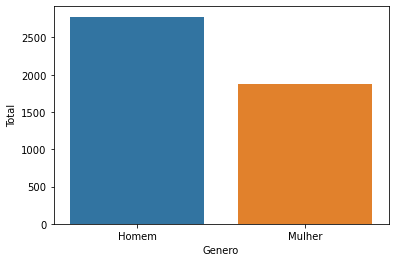

In [75]:
sns.barplot(x='Genero',y='Total', data = cont_generos)

In [76]:
cont_generos['Porcentagem'] = (cont_generos.Total/dados.shape[0]).round(2)
cont_generos

,Genero,Total,Porcentagem
0,Homem,2778,0.6
1,Mulher,1875,0.4


([<matplotlib.patches.Wedge at 0x1d164ce11c0>,
 [Text(-0.33991877217145816, 1.046162142464278, 'Homem'),
  Text(0.3399188701202255, -1.0461621106387813, 'Mulher')])

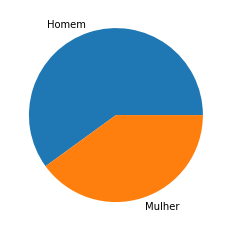

In [77]:
plt.pie(cont_generos['Porcentagem'], 
        labels=cont_generos['Genero'])

**Investigando a distribuição da escolaridade na empresa**

In [78]:
dados.Escolaridade.unique()

array(['Graduado', 'Mestrado', 'PhD'], dtype=object)

In [79]:
dados.Escolaridade.value_counts()

Graduado    3601
Mestrado     873
PhD          179
Name: Escolaridade, dtype: int64

In [80]:
dados.Escolaridade.value_counts().index

Index(['Graduado', 'Mestrado', 'PhD'], dtype='object')

In [81]:
dados.Escolaridade.value_counts().values

array([3601,  873,  179], dtype=int64)

In [82]:
cont_escolaridade = dados['Escolaridade'].value_counts().to_frame().reset_index()
cont_escolaridade.columns = ['Escolaridade','Total']
cont_escolaridade

,Escolaridade,Total
0,Graduado,3601
1,Mestrado,873
2,PhD,179


<AxesSubplot:xlabel='Escolaridade', ylabel='Total'>

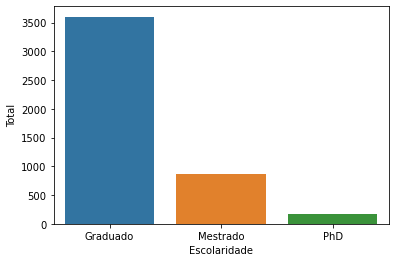

In [83]:
sns.barplot(x='Escolaridade',y='Total', data = cont_escolaridade)

In [84]:
cont_escolaridade['Porcentagem'] = (cont_escolaridade.Total/dados.shape[0]).round(2)
cont_escolaridade

,Escolaridade,Total,Porcentagem
0,Graduado,3601,0.77
1,Mestrado,873,0.19
2,PhD,179,0.04


([<matplotlib.patches.Wedge at 0x1d164d7cd90>,
 [Text(-0.8251221330042984, 0.7274431012982644, 'Graduado'),
  Text(0.7274429467912326, -0.8251222692205611, 'Mestrado'),
  Text(1.0913261524711573, -0.13786670712140953, 'PhD')])

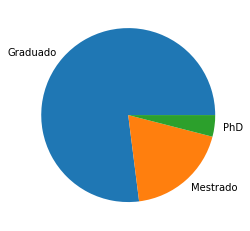

In [85]:
plt.pie(cont_escolaridade['Porcentagem'], 
        labels=cont_escolaridade['Escolaridade'])

**Agrupando os funcionarios por sexo e escolaridade**

In [86]:
funcionarios = dados[['Escolaridade','Sexo']]

In [87]:
funcionarios

,Escolaridade,Sexo
0,Graduado,Homem
1,Graduado,Mulher
2,Graduado,Mulher
3,Mestrado,Homem
4,Mestrado,Homem
...,...,...
4648,Graduado,Mulher
4649,Mestrado,Homem
4650,Mestrado,Homem
4651,Graduado,Homem


In [88]:
querys = funcionarios
querys

,Escolaridade,Sexo
0,Graduado,Homem
1,Graduado,Mulher
2,Graduado,Mulher
3,Mestrado,Homem
4,Mestrado,Homem
...,...,...
4648,Graduado,Mulher
4649,Mestrado,Homem
4650,Mestrado,Homem
4651,Graduado,Homem


In [89]:
q1 = (funcionarios.Escolaridade == 'Graduado') & (funcionarios.Sexo == 'Homem')
q2 = (funcionarios.Escolaridade == 'Mestrado') & (funcionarios.Sexo == 'Homem')
q3 = (funcionarios.Escolaridade == 'PhD') & (funcionarios.Sexo == 'Homem')

homem_grad = querys[q1]
homem_grad = homem_grad.shape[0]
querys = funcionarios
homem_mestrado = querys[q2]
homem_mestrado = homem_mestrado.shape[0]
querys = funcionarios
homem_phd = querys[q3]
homem_phd = homem_phd.shape[0]
querys = funcionarios

In [90]:
q1 = (funcionarios.Escolaridade == 'Graduado') & (funcionarios.Sexo == 'Mulher')
q2 = (funcionarios.Escolaridade == 'Mestrado') & (funcionarios.Sexo == 'Mulher')
q3 = (funcionarios.Escolaridade == 'PhD') & (funcionarios.Sexo == 'Mulher')

mulher_grad = querys[q1]
mulher_grad = mulher_grad.shape[0]
querys = funcionarios
mulher_mestrado = querys[q2]
mulher_mestrado = mulher_mestrado.shape[0]
querys = funcionarios
mulher_phd = querys[q3]
mulher_phd = mulher_phd.shape[0]
querys = funcionarios


In [91]:
escolaridade_por_genero = {
    'Graduados':{'Homens':homem_grad,'Mulheres':mulher_grad},
    'Mestres':{'Homens':homem_mestrado,'Mulheres':mulher_mestrado},
    'PhD':{'Homens':homem_phd,'Mulheres':mulher_phd}
}
escolaridade_por_genero = pd.DataFrame(escolaridade_por_genero)
escolaridade_por_genero = escolaridade_por_genero.reset_index().rename(columns={'index':'Genero'})
escolaridade_por_genero

,Genero,Graduados,Mestres,PhD
0,Homens,2166,502,110
1,Mulheres,1435,371,69


<AxesSubplot:xlabel='Genero', ylabel='Graduados'>

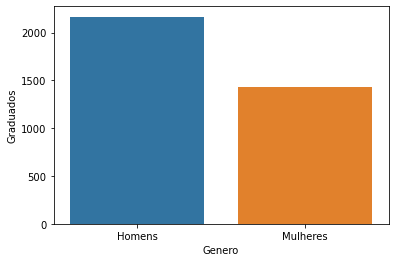

In [92]:
sns.barplot(x='Genero',y='Graduados', data = escolaridade_por_genero)

<AxesSubplot:xlabel='Genero', ylabel='Mestres'>

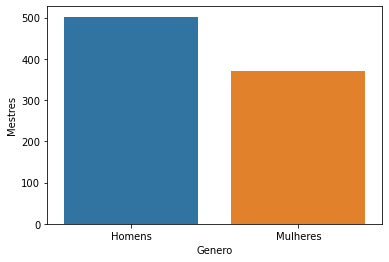

In [93]:
sns.barplot(x='Genero',y='Mestres', data = escolaridade_por_genero)

<AxesSubplot:xlabel='Genero', ylabel='PhD'>

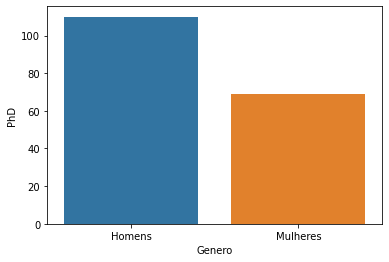

In [94]:
sns.barplot(x='Genero',y='PhD', data = escolaridade_por_genero)

In [95]:
escolaridade_por_genero['Porcentagem_Graduados'] = (escolaridade_por_genero.Graduados/cont_escolaridade.Total.loc[0]).round(2)
escolaridade_por_genero

,Genero,Graduados,Mestres,PhD,Porcentagem_Graduados
0,Homens,2166,502,110,0.6
1,Mulheres,1435,371,69,0.4


In [96]:
escolaridade_por_genero['Porcentagem_Mestrados'] = (escolaridade_por_genero.Mestres/cont_escolaridade.Total.loc[1]).round(2)
escolaridade_por_genero

,Genero,Graduados,Mestres,PhD,Porcentagem_Graduados,Porcentagem_Mestrados
0,Homens,2166,502,110,0.6,0.58
1,Mulheres,1435,371,69,0.4,0.42


In [97]:
escolaridade_por_genero['Porcentagem_PhD'] = (escolaridade_por_genero.PhD/cont_escolaridade.Total.loc[2]).round(2)
escolaridade_por_genero

,Genero,Graduados,Mestres,PhD,Porcentagem_Graduados,Porcentagem_Mestrados,Porcentagem_PhD
0,Homens,2166,502,110,0.6,0.58,0.61
1,Mulheres,1435,371,69,0.4,0.42,0.39


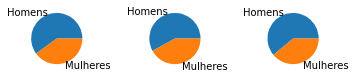

In [98]:
ax = plt.subplot(3,3,1)
plt.pie(escolaridade_por_genero['Porcentagem_Graduados'], 
        labels=escolaridade_por_genero['Genero'])
plt.subplot(3,3,2)
plt.pie(escolaridade_por_genero['Porcentagem_Mestrados'], 
        labels=escolaridade_por_genero['Genero'])
plt.subplot(3,3,3)
plt.pie(escolaridade_por_genero['Porcentagem_PhD'], 
        labels=escolaridade_por_genero['Genero'])
ax=ax

## Observações:
> **Infere-se, a partir dos dados obtidos, que há um maior número de funcionários do sexo masculino trabalhando na empresa. A taxa de disparidade em todas as faixas de escolaridade encontrada é a mesma, girando em torno de 40% fixo, de trabalhadoras em todos os postos.**

## Investigando os níveis salariais e correlações com os demais campos

In [99]:
dados

,Escolaridade,Ano_de_Admissao,Cidade,Rank_pagamento,Idade,Sexo,Esta_em_projeto,Nivel_de_experiencia,Sair_da_empresa
0,Graduado,2017,Bangalore,3,34,Homem,Não,0,0
1,Graduado,2013,Pune,1,28,Mulher,Não,3,1
2,Graduado,2014,New Delhi,3,38,Mulher,Não,2,0
3,Mestrado,2016,Bangalore,3,27,Homem,Não,5,1
4,Mestrado,2017,Pune,3,24,Homem,Sim,2,1
...,...,...,...,...,...,...,...,...,...
4648,Graduado,2013,Bangalore,3,26,Mulher,Não,4,0
4649,Mestrado,2013,Pune,2,37,Homem,Não,2,1
4650,Mestrado,2018,New Delhi,3,27,Homem,Não,5,1
4651,Graduado,2012,Bangalore,3,30,Homem,Sim,2,0


In [125]:
frequencia = dados.Rank_pagamento.value_counts()
percentual = (dados.Rank_pagamento.value_counts(normalize=True)*100).round(2)
dist_freq_pagamento = pd.DataFrame({'Frequencia':frequencia,'Percentual (%)':percentual})
dist_freq_pagamento.rename_axis('Rank_Pagamento', axis='columns',inplace=True)
dist_freq_pagamento

Rank_Pagamento,Frequencia,Percentual (%)
3,3492,75.05
2,918,19.73
1,243,5.22


In [126]:
sns.barplot(x='Rank_Pagamento',y='Frequencia', data = dist_freq_pagamento)

ValueError: Could not interpret input 'Rank_Pagamento'

In [117]:
frequencia = dados.Ano_de_Admissao.value_counts()
percentual = (dados.Ano_de_Admissao.value_counts(normalize=True)*100).round(2)
dist_freq_ano = pd.DataFrame({'Frequencia':frequencia,'Percentual (%)':percentual})
dist_freq_ano.rename_axis('Ano', axis='columns',inplace=True)
dist_freq_ano

Ano,Frequencia,Percentual (%)
2017,1108,23.81
2015,781,16.78
2014,699,15.02
2013,669,14.38
2016,525,11.28
2012,504,10.83
2018,367,7.89


In [103]:
df_por_salario = dados[['Rank_pagamento','Escolaridade','Ano_de_Admissao']]
df_por_salario

,Rank_pagamento,Escolaridade,Ano_de_Admissao
0,3,Graduado,2017
1,1,Graduado,2013
2,3,Graduado,2014
3,3,Mestrado,2016
4,3,Mestrado,2017
...,...,...,...
4648,3,Graduado,2013
4649,2,Mestrado,2013
4650,3,Mestrado,2018
4651,3,Graduado,2012


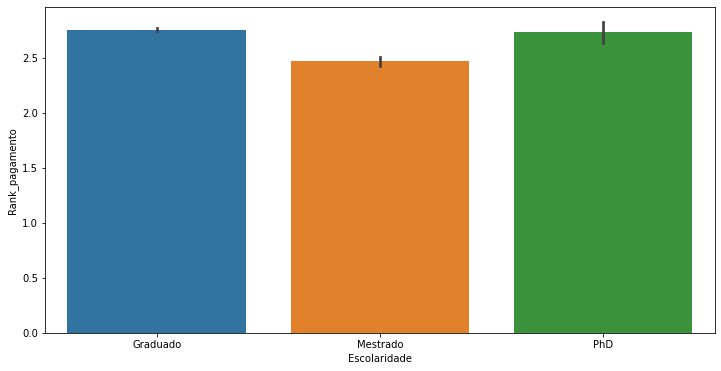

In [107]:
plt.figure(figsize=(12,6))
ax.set_title('Correlação Salário x Escolaridade', fontsize=18,loc='left')
sns.barplot(x='Escolaridade',y='Rank_pagamento', data = df_por_salario)
ax = ax

ValueError: Could not interpret input 'Ano_de_admissao'

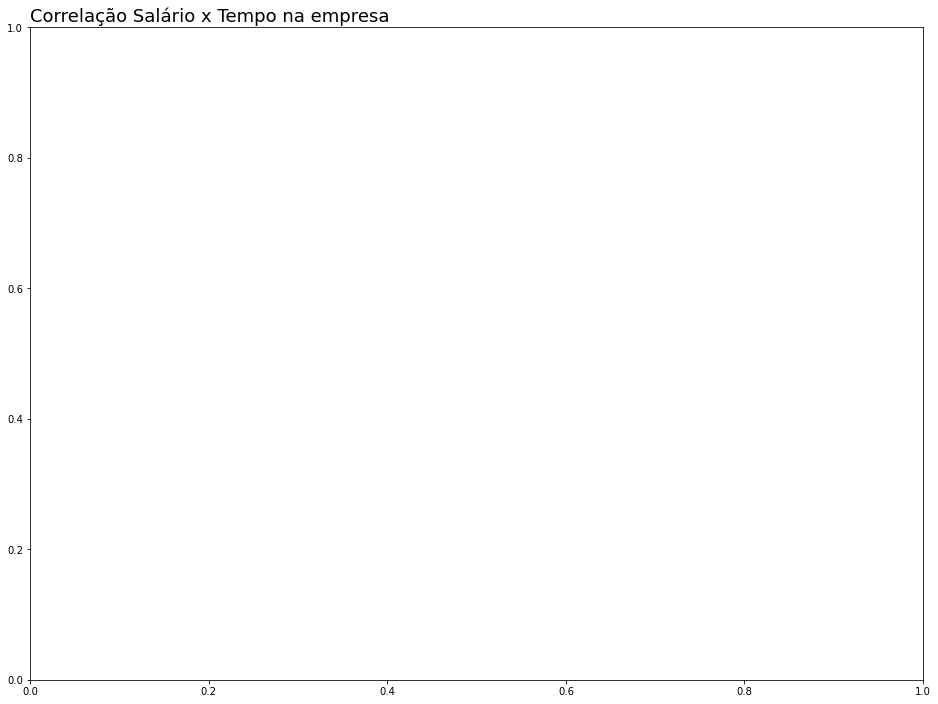

In [105]:
plt.figure(figsize=(16,12))
ax = plt.subplot(1,1,1)
ax.set_title('Correlação Salário x Tempo na empresa', fontsize=18,loc='left')
sns.barplot(x='Ano_de_admissao',y='Rank_pagamento', data = df_por_salario)
ax = ax